<a href="https://colab.research.google.com/github/Ma7moudYasser/IntelligentAglorithmsForERU/blob/main/ANN%20for%20Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Imports

In [2]:
!pip install matplotlib

In [4]:
import numpy as np
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
from IPython import display
display.set_matplotlib_formats('svg')

<ipython-input-4-2ce0d24443bf>:6: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  display.set_matplotlib_formats('svg')


# Creating the data

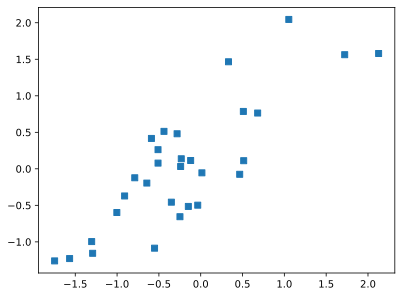

In [17]:
N = 30
x = torch.randn(N,1)
y = x + torch.randn(N,1)/2


# Plotting the data
plt.plot(x,y, 's')
plt.show()

# Implementing the neural Network

In [18]:
AnnReg = nn.Sequential(
    nn.Linear(1,1),    ## input of the neural network
    nn.ReLU(),         ## Activation function
    nn.Linear(1,1)    ## Output of the network
)
AnnReg

Sequential(
  (0): Linear(in_features=1, out_features=1, bias=True)
  (1): ReLU()
  (2): Linear(in_features=1, out_features=1, bias=True)
)

# Optimizing parameters

In [19]:
#Learning rate
learning_rate = 0.5


#Loss function
lossfun = nn.MSELoss()

# Optimizer (The flavor of gradient descent to implement)
optimizer = torch.optim.SGD(AnnReg.parameters(), lr = learning_rate)

# Train the model

In [20]:
numepochs = 500
losses = torch.zeros(numepochs)


## Train the model

for epochi in range(numepochs):
  #Forward pass
  yHat = AnnReg(x)


  #Computer Loss
  loss = lossfun(yHat, y)
  losses[epochi] = loss

  #backprop
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()





# Illustration

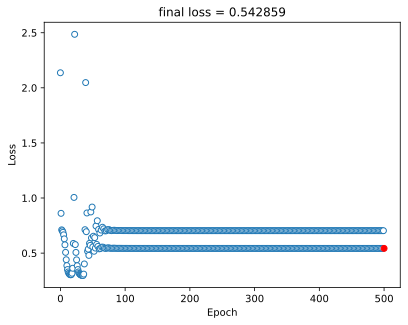

In [21]:
##Manually computer losses
## Final forward pass
predictions = AnnReg(x)

# final loss (MSE)
testloss = (predictions - y).pow(2).mean()


plt.plot(losses.detach(), 'o', markerfacecolor = 'w', linewidth = 0.1)
plt.plot(numepochs, testloss.detach(), 'ro')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('final loss = %g' %testloss.item())
plt.show()

In [22]:
testloss

tensor(0.5429, grad_fn=<MeanBackward0>)

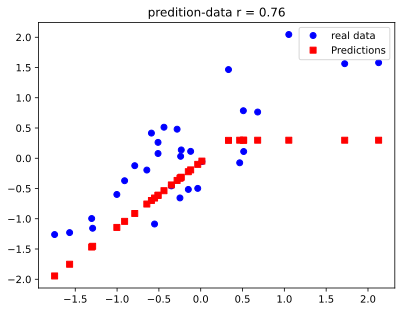

In [25]:
#Plot the data
plt.plot(x,y, 'bo', label = 'real data')
plt.plot(x, predictions.detach(), 'rs', label = 'Predictions')
plt.title(f'predition-data r = {np.corrcoef(y.T , predictions.detach().T)[0,1]:.2f}')
plt.legend()
plt.show()